In [616]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style='white', palette='rainbow')

In [617]:
data = pd.read_csv("data/student-mat.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [618]:
data.shape

(395, 33)

## Visualize Resp

In [619]:
fig = plt.figure(figsize=(20, 16))
data.loc[data.G3 < 12, 'G3_binary'] = 0
data.loc[data.G3 >= 12, 'G3_binary'] = 1
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G3_binary
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,0.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,0.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,0.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,0.0


<Figure size 1440x1152 with 0 Axes>

<AxesSubplot: xlabel='G3_binary', ylabel='count'>

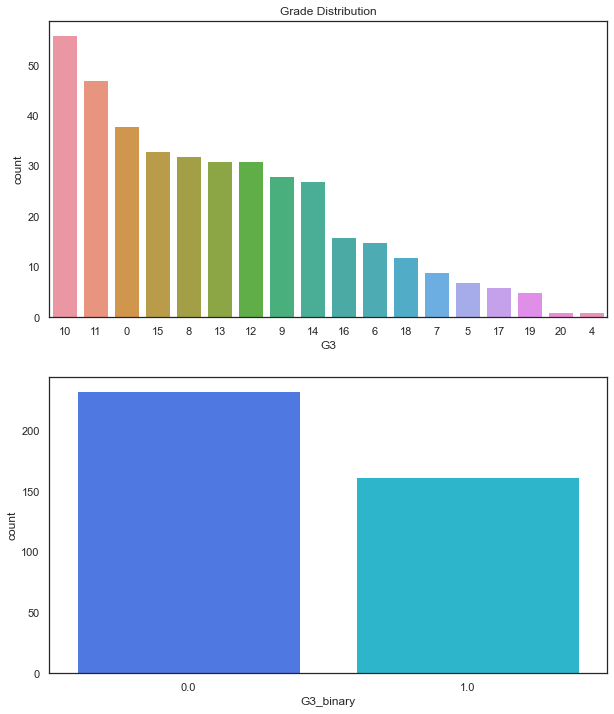

In [620]:
fig = plt.figure(figsize=(10, 12))
fig.add_subplot(2, 1, 1)
sns.countplot(x='G3', data=data, order=data['G3'].value_counts().index).set_title("Grade Distribution")
fig.add_subplot(2, 1, 2)
sns.countplot(x=data.G3_binary, order=data.G3_binary.value_counts().index)

<AxesSubplot: >

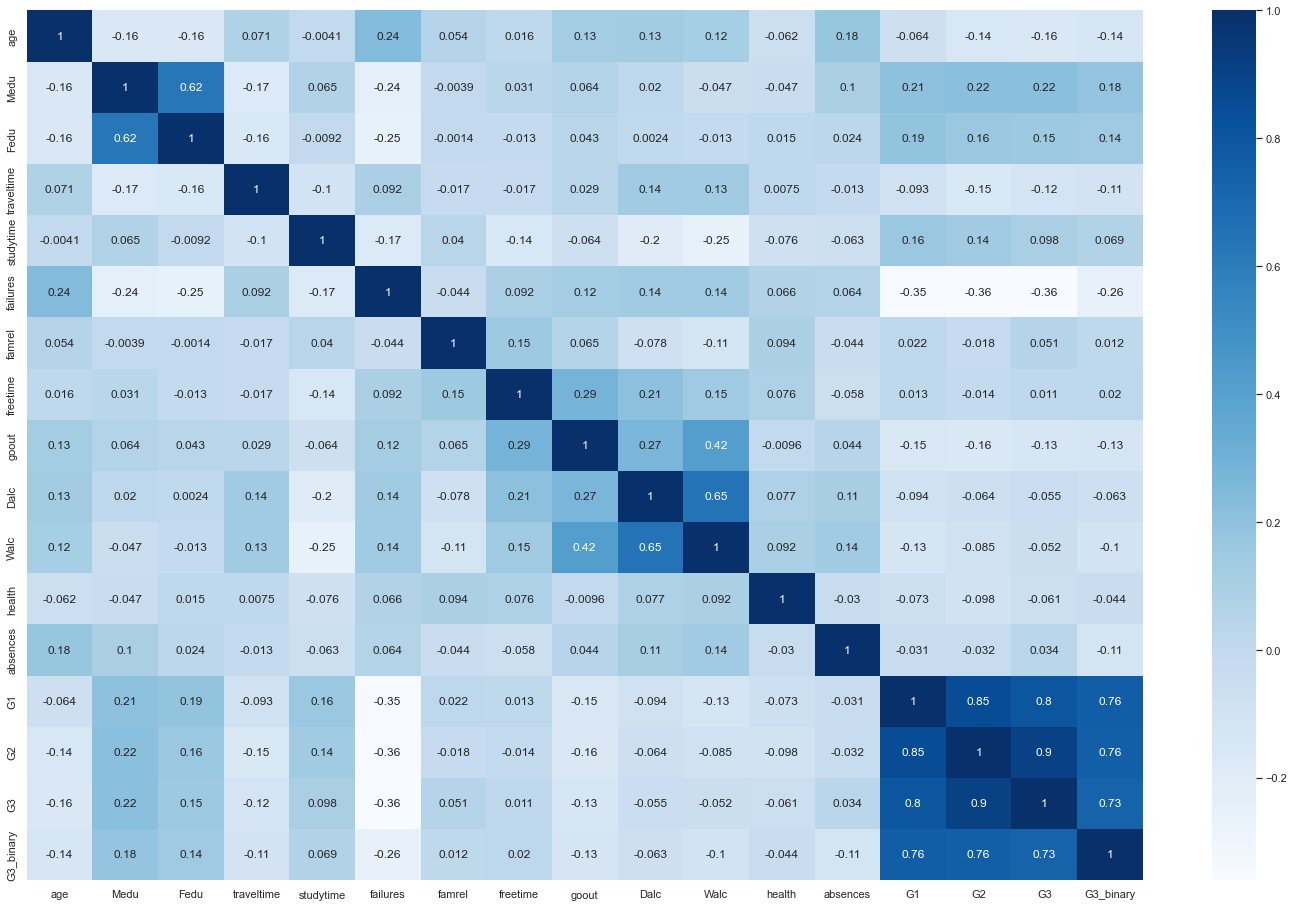

In [572]:
plt.figure(figsize=(25, 16))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='Blues')

### Study-related

Text(0.5, 1.0, 'Internet Access vs G3')

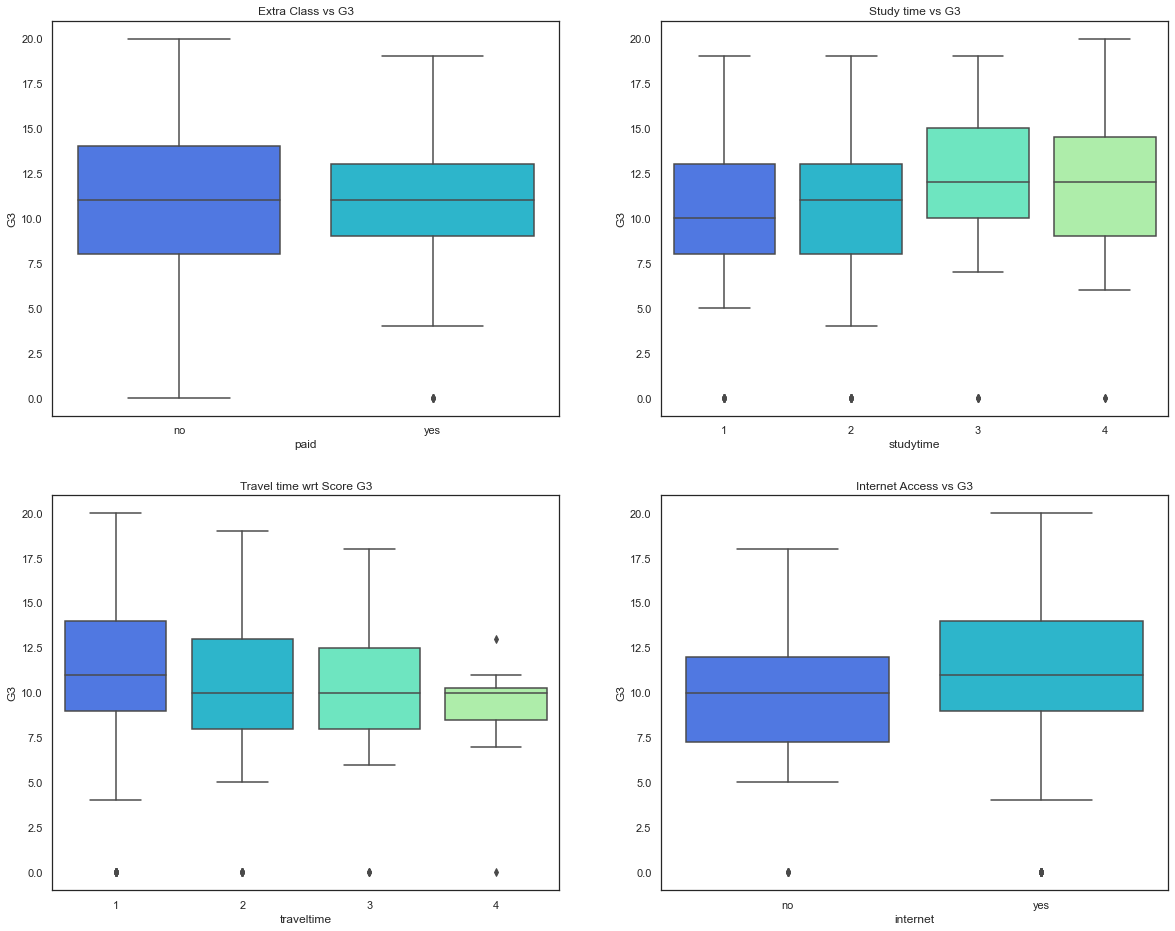

In [621]:
fig = plt.figure(figsize=(20, 16))
fig.add_subplot(2, 2, 1)
sns.boxplot(x='paid', y='G3', data=data).set_title('Extra Class vs G3')

fig.add_subplot(2, 2, 2)
sns.boxplot(x='studytime', y='G3', data=data).set_title('Study time vs G3')

fig.add_subplot(2, 2, 3)
sns.boxplot(x='traveltime', y='G3', data=data).set_title('Travel time wrt Score G3')

fig.add_subplot(2, 2, 4)
sns.boxplot(x='internet', y='G3', data=data).set_title('Internet Access vs G3')

### Social Factors

Text(0.5, 1.0, 'Romantic Relation vs G3')

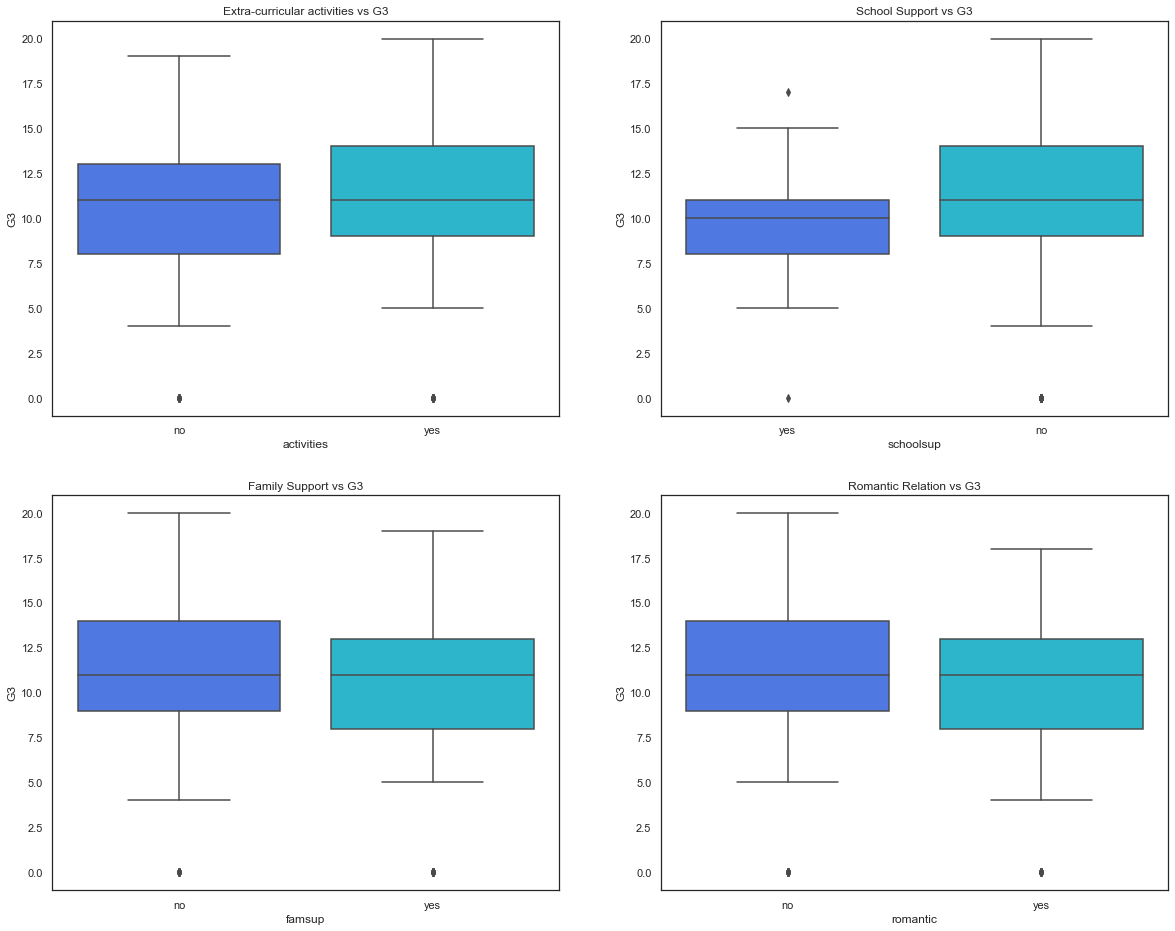

In [622]:
fig = plt.figure(figsize=(20, 16))
fig.add_subplot(2, 2, 1)
sns.boxplot(x='activities', y='G3', data=data).set_title('Extra-curricular activities vs G3')
fig.add_subplot(2, 2, 2)
sns.boxplot(x='schoolsup', y='G3', data=data).set_title('School Support vs G3')
fig.add_subplot(2, 2, 3)
sns.boxplot(x='famsup', y='G3', data=data).set_title('Family Support vs G3')
fig.add_subplot(2, 2, 4)
sns.boxplot(x='romantic', y='G3', data=data).set_title('Romantic Relation vs G3')

## Behavioral

Text(0.5, 1.0, 'Failutres vs G3')

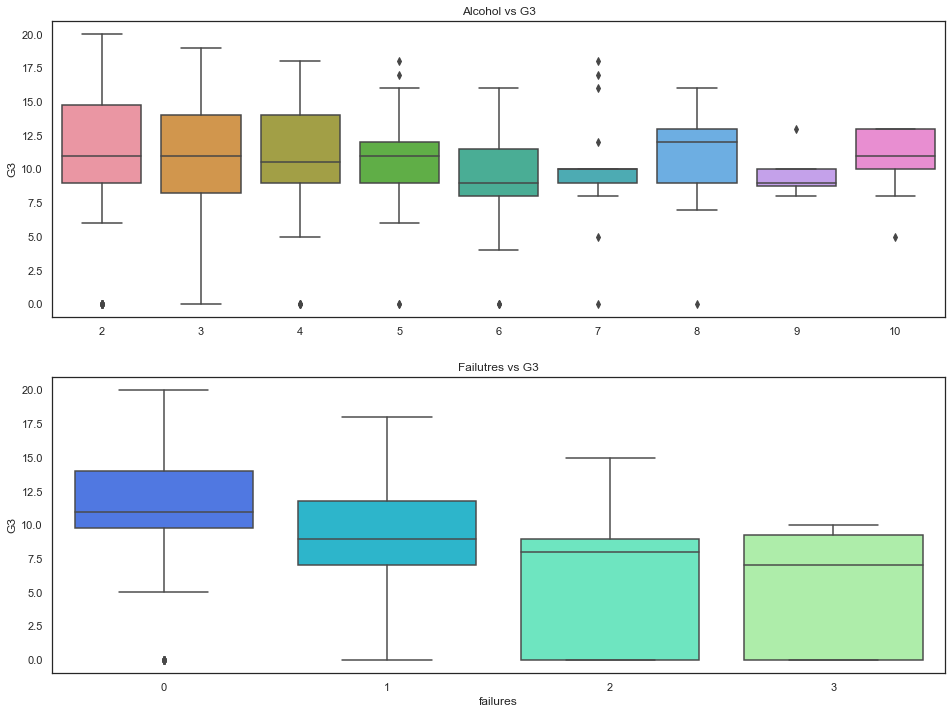

In [631]:
#fig = plt.figure(figsize=(16, 6))

# sns.boxplot(x='Dalc', y='G3', data=data).set_title('Dalc vs G3')
# fig.add_subplot(1, 2, 2)
# sns.boxplot(x='Walc', y='G3', data=data).set_title('Walc vs G3')

fig = plt.figure(figsize=(16, 12))
fig.add_subplot(2, 1, 1)
alc = data['Dalc'] + data['Walc']
sns.boxplot(x=alc, y='G3',  data=data).set_title('Alcohol vs G3')
fig.add_subplot(2, 1, 2)
sns.boxplot(x='failures', y='G3',  data=data).set_title('Failutres vs G3')

Text(0.5, 1.0, 'G2 versus G3')

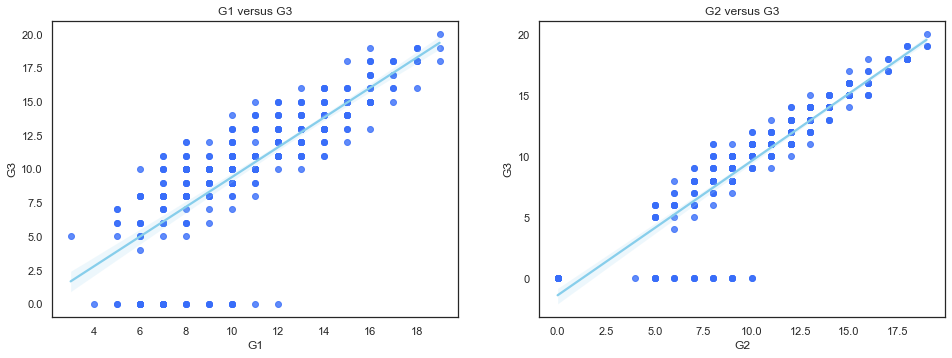

In [576]:
fig = plt.figure(figsize=(16, 12))
fig.add_subplot(2, 2, 1)
sns.regplot(x='G1', y='G3', data=data, line_kws={'color': 'skyblue'}).set_title('G1 versus G3')
fig.add_subplot(2, 2, 2)
sns.regplot(x='G2', y='G3', data=data, line_kws={'color': 'skyblue'}).set_title('G2 versus G3')

Text(0.5, 1.0, 'G1, G2, and G3')

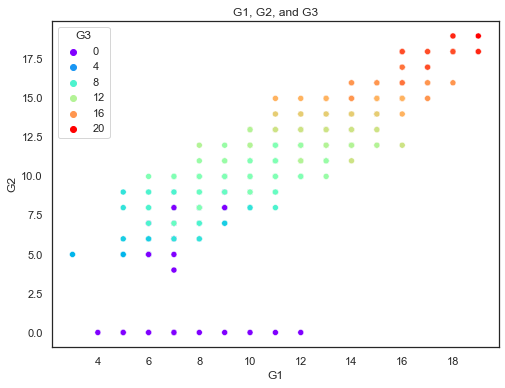

In [594]:
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(x='G1', y='G2', hue = 'G3', data=data, palette="rainbow").set_title('G1, G2, and G3')

## Pre-Processsing

In [ ]:
data['school'] = data['school'].map({'GP':0, 'MS':1})
data['sex'] = data['sex'].map({'F':0, 'M':1})
data['famsize'] = data['famsize'].map({'GT3':0, 'LE3':1})

binary_mapping = {'yes':1, 'no':0}
data['schoolsup'] = data['schoolsup'].map(binary_mapping)
data['famsup'] = data['famsup'].map(binary_mapping)
data['paid'] = data['paid'].map(binary_mapping)
data['activities'] = data['activities'].map(binary_mapping)
data['nursery'] = data['nursery'].map(binary_mapping)
data['higher'] = data['higher'].map(binary_mapping)
data['internet'] = data['internet'].map(binary_mapping)
data['romantic'] = data['romantic'].map(binary_mapping)

data.loc[:,'alcohol']= data['Dalc'] + data['Walc']
data = data.drop(columns=['G1', 'G2'])

In [ ]:
X = data.iloc[:,:33].select_dtypes(exclude="object")
y = data.G3

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

k_best = SelectKBest(score_func=chi2, k=15)
k_best.fit(X, y)
df_score = pd.Series(data=k_best.scores_, index=X.columns)
df_score.sort_values(ascending=False)

G3            794.023821
absences      648.166848
G3_binary     233.000000
failures      140.934898
alcohol        41.036997
Walc           28.444167
schoolsup      28.319018
romantic       20.089526
Dalc           17.082868
paid           16.129900
Medu           13.894852
famsize        12.429690
sex            10.581662
goout          10.472494
Fedu           10.375563
school         10.310678
health         10.176668
activities      7.601049
traveltime      6.758151
studytime       6.231603
famsup          5.303438
freetime        4.479465
nursery         3.297083
internet        2.999142
age             2.277762
famrel          2.110686
higher          1.234479
dtype: float64

In [ ]:
features_selected = df_score.nlargest(3).index

In [ ]:
# train = split
from sklearn.model_selection import train_test_split, KFold, cross_val_score
k_fold = KFold(n_splits=10, random_state=1, shuffle=True)
train, test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
train.head()

,school,sex,age,famsize,Medu,Fedu,traveltime,studytime,failures,schoolsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,G3,G3_binary,alcohol
23,0,1,16,1,2,2,2,2,0,0,...,5,4,4,2,4,5,0,12,1.0,6
296,0,0,19,0,4,4,2,2,0,0,...,2,3,4,2,3,2,0,0,0.0,5
13,0,1,15,0,4,3,2,2,0,0,...,5,4,3,1,2,3,2,11,0.0,3
249,0,1,16,0,0,2,1,1,0,0,...,4,3,2,2,4,5,0,15,1.0,6
61,0,0,16,0,1,1,4,1,0,1,...,5,5,5,5,5,5,6,11,0.0,10


In [ ]:
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Lasso
# from sklearn.linear_model import Ridge
# classifiers = {
#     'Linear Regression' : LinearRegression(),
#     'Lasso': Lasso(),
#     'Ridge': Ridge(),
# }

# for key, clf in classifiers.items():
#     print(key, clf)
#     score = cross_val_score(clf, X_train, y_train, cv=k_fold, scoring='neg_mean_squared_error')
#     rmse = np.sqrt(-score)
#     rmse_score = np.mean(rmse)
#     print('RMSE score with CV of {0} is {1}'.format(key, rmse_score))

In [ ]:
# lm_fit = LinearRegression().fit(X_train, y_train)
# lm_fit.coef_

In [ ]:
# pred_score = lasso_fit.predict(X[selected])
# df_res = pd.DataFrame([pred_score,y], index=["pred","true"]).T
# df_res.loc[pred_score < 12] = 0
# df_res.loc[pred_score >= 12] = 1
# y[y < 12] = 0
# y[y >= 12] = 1
# # df_res
# np.mean(df_res.pred == df_res.true)

# Linear Regression Model

In [ ]:
train = pd.DataFrame(train)
train.head()

,school,sex,age,famsize,Medu,Fedu,traveltime,studytime,failures,schoolsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,G3,G3_binary,alcohol
23,0,1,16,1,2,2,2,2,0,0,...,5,4,4,2,4,5,0,12,1.0,6
296,0,0,19,0,4,4,2,2,0,0,...,2,3,4,2,3,2,0,0,0.0,5
13,0,1,15,0,4,3,2,2,0,0,...,5,4,3,1,2,3,2,11,0.0,3
249,0,1,16,0,0,2,1,1,0,0,...,4,3,2,2,4,5,0,15,1.0,6
61,0,0,16,0,1,1,4,1,0,1,...,5,5,5,5,5,5,6,11,0.0,10


#### G3 ~  absences * failures  + schoolsup + romantic

In [ ]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='G3 ~  absences + failures  + schoolsup + romantic', data=train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     13.90
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           1.92e-10
Time:                        12:34:14   Log-Likelihood:                -916.09
No. Observations:                 316   AIC:                             1842.
Df Residuals:                     311   BIC:                             1861.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.5528      0.363     31.810      0.000      10.838      12.267
absences       0.0456      0.031      1.488      0.138      -0.015       0.106
failures      -2.3546      0.365     -6.458      0.000      -3.072      -1.637
schoolsup     -1.6088      0.799     -2.013      0.045      -3.182      -0.036
romantic      -1.4502      0.539     -2.692      0.007      -2.510      -0.390
==============================================================================
Omnibus:                       23.978   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.411
Skew:                          -0.714   Prob(JB):                     1.12e-06
Kurtosis:                       3.213   Cond. No.                         32.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
lm.params

Intercept    11.552760
absences      0.045556
failures     -2.354643
schoolsup    -1.608830
romantic     -1.450169
dtype: float64

##### G3 =
#### 11.715247 +  absences * (-0.001286) + failures * (-3.199632) + absences * failures (0.166180 + schoolsup * (-1.588172) + romantic * (-1.349672)

## Predicting Test Dataset

In [ ]:
pred_test = lm.predict(test)
data = pd.concat([pred_test, y_test], axis = 1)
test_res = pd.DataFrame(data, columns=["predicted", "actual"], dtype="float64")
test_res[pred_test < 12],test_res[pred_test >= 12] = 0,1
test_res[pred_test < 6],test_res[pred_test >= 12] = 0,1
y_test[y_test < 12],y_test[y_test >= 12] = 0,1
# test_res.head()

In [ ]:
np.mean(test_res.predicted == test_res.actual)

1.0

## Predicting Full Dataset

In [ ]:
X.shape, y.shape

((395, 27), (395,))

In [ ]:
pred_full = lm.predict(X)
pred_full[pred_full < 12] = 0
pred_full[pred_full >= 12] = 1

In [ ]:
data = pd.concat([pred_full, y], axis = 1)
test_res = pd.DataFrame(data, columns=["predicted", "actual"], dtype="float64")
test_res[pred_full < 12] = 0
test_res[pred_full >= 12] = 1
y_test[y_test < 12] = 0
y_test[y_test >= 12] = 1
test_res

,predicted,actual
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
390,0.0,0.0
391,0.0,0.0
392,0.0,0.0
393,0.0,0.0


In [ ]:
np.mean(test_res.predicted == test_res.actual)

1.0